# Deskripsi Kasus

Dataset drama Korea ini merupakan kumpulan informasi mengenai berbagai drama Korea yang telah dirilis, mencakup detail seperti tahun rilis, jumlah episode, dan rating. Tujuan dari dataset ini adalah untuk memberikan rekomendasi drama berdasarkan rating dan genre, serta untuk menganalisis tren popularitas di kalangan penonton.

Name: Judul drama Korea.

Year of release: Tahun saat drama tersebut dirilis.

Aired On: Hari atau platform di mana drama ditayangkan.

Number of Episode: Jumlah total episode dalam drama.

Network: Jaringan atau platform yang menayangkan drama (misalnya, Netflix, tvN).

Duration: Durasi setiap episode, biasanya dalam menit.

Content Rating: Rating usia untuk konten drama (misalnya, 15+, 18+).

Genre: Kategori genre dari drama (misalnya, komedi, thriller, romantis).

Rank: Peringkat drama berdasarkan rating yang diberikan oleh penonton.

Rating: Nilai rating drama, biasanya dalam skala 1-10, menunjukkan kualitas atau kepuasan penonton.

# Visualisasi Data

In [86]:
import pandas as pd

df = pd.read_csv('C:/Users/DELL/OneDrive/Analisis Data Ekploratif/Rekomendasi Drama Korea-Data Tugas EDA.csv', delimiter=';')
df.head()

,Name,Year of release,Aired On,Number of Episode,Network,Duration,Content Rating,Genre,Rank,Rating
0,Move to Heaven,2021,Friday,10,Netflix,52 min.,18+,"Life, Drama, Family",1,"9,2"
1,Hospital Playlist,2020,Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+,"Friendship, Romance, Life, Medical",2,"9,1"
2,Flower of Evil,2020,"Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+,"Thriller, Romance, Crime",3,"9,1"
3,Hospital Playlist 2,2021,Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+,"Friendship, Romance, Life, Medical",4,"9,1"
4,My Mister,2018,"Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+,"Psychological, Life, Drama, Family",5,"9,1"


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               99 non-null     object
 1   Year of release    99 non-null     int64 
 2   Aired On           99 non-null     object
 3   Number of Episode  99 non-null     int64 
 4   Network            99 non-null     object
 5   Duration           99 non-null     object
 6   Content Rating     99 non-null     object
 7   Genre              99 non-null     object
 8   Rank               99 non-null     int64 
 9   Rating             99 non-null     object
dtypes: int64(3), object(7)
memory usage: 7.9+ KB


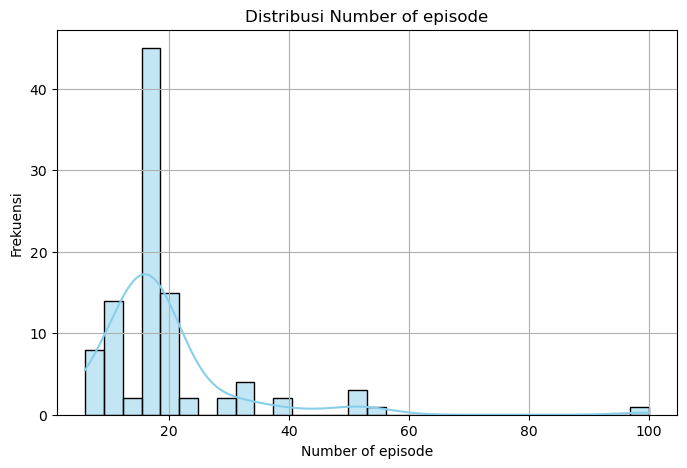

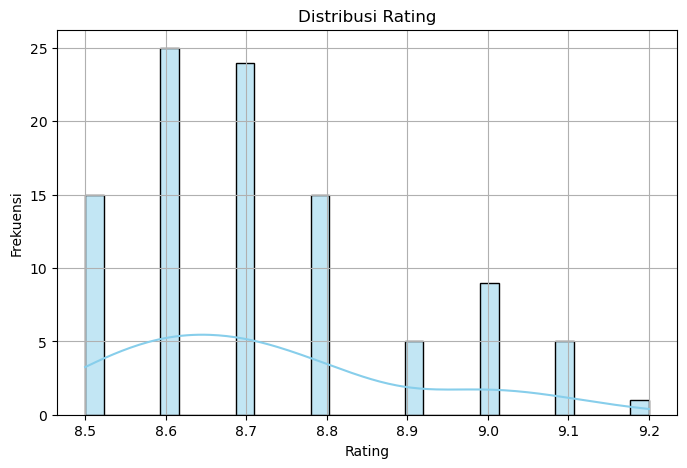

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan kolom Rating adalah numeric
df['Rating'] = df['Rating'].str.replace(',', '.').astype(float)

# Kolom yang akan dianalisis
columns = ['Number of Episode', 'Rating']

for column in columns:
    plt.figure(figsize=(8, 5))
    
    sns.histplot(df[column].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.show()

dari grafik tersebut dapat diliat bahwa banyak drama tidak memiliki episode yang terlalu banyak dan umumnya memiliki rating yang lebih rendah.

Sedangkan untuk data yang rasio

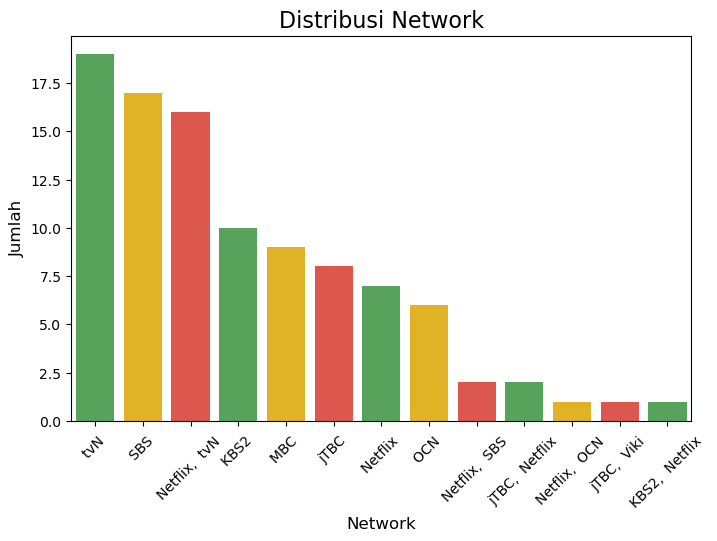

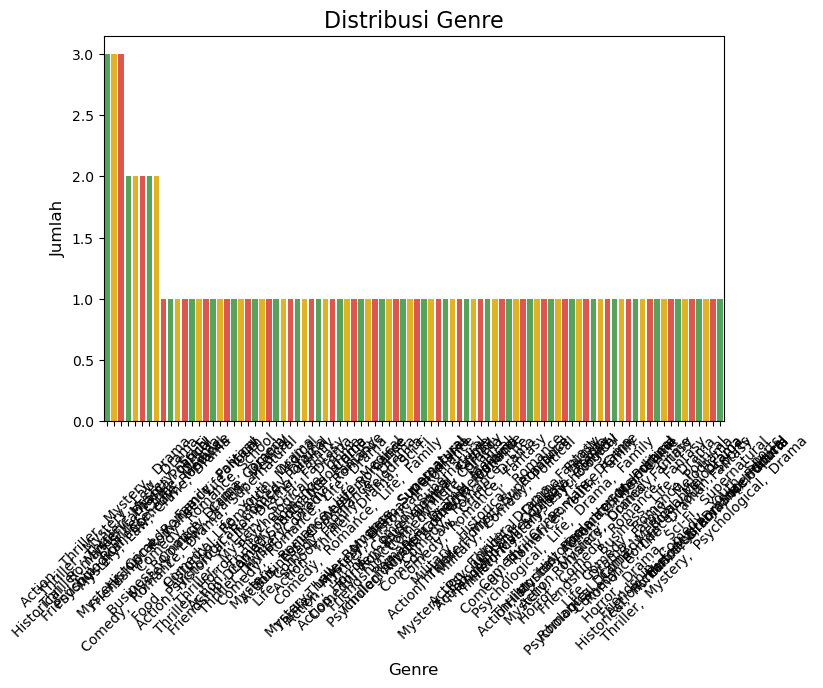

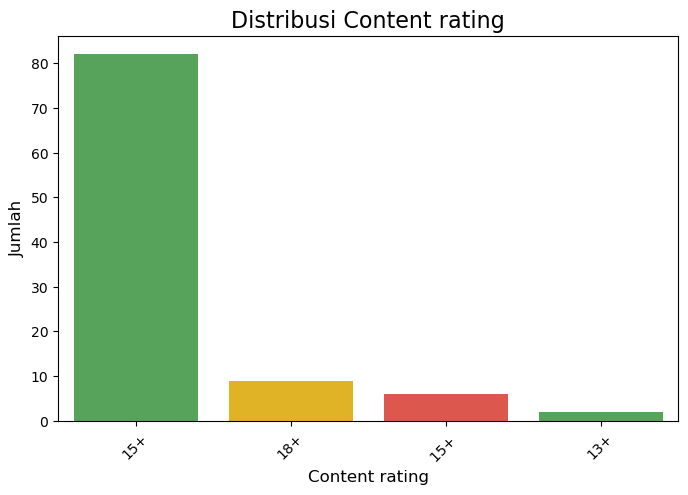

In [52]:
# Load dataset
data_path = 'C:/Users/DELL/OneDrive/Analisis Data Ekploratif/Rekomendasi Drama Korea-Data Tugas EDA.csv'
df = pd.read_csv(data_path, delimiter=';')

# Mengatur kolom kategorikal yang ingin dianalisis
categorical_columns = ['Network', 'Genre', 'Content Rating']

# Palette kustom untuk visualisasi (ganti warna sesuai preferensi)
custom_palette = ['#4CAF50', '#FFC107', '#F44336']
# Visualisasi distribusi untuk setiap kolom kategorikal
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[column], order=df[column].value_counts().index, palette=custom_palette)
    plt.title(f'Distribusi {column.capitalize()}', fontsize=16)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Jumlah', fontsize=12)
    plt.xticks(rotation=45)
    
    plt.show()


Network, Genre, dan Content Rating merupakan variabel nominal (kategorikal).
- Network: Distribusi ini bersifat kategorikal, karena Network terdiri dari beberapa kategori yang tidak memiliki urutan. Setiap jaringan (seperti tvN, SBS, KBS) mewakili sebuah kategori yang menunjukkan platform di mana drama tersebut ditayangkan. Tidak ada probabilitas terdefinisi atau urutan antara kategori-kategori ini, sehingga tidak dapat dimasukkan ke dalam distribusi bernoulli.
- Genre: Ini juga merupakan distribusi kategorikal, di mana setiap genre (misalnya romantis, aksi, komedi) adalah kategori yang berbeda. Genre tidak memiliki urutan dan masing-masing genre memiliki frekuensi yang berbeda dalam dataset. Karena sifat kategorikal ini, genre tidak mengikuti distribusi probabilitas tertentu dan tidak dapat dianalisis menggunakan distribusi bernoulli.
- Content Rating: Seperti kedua variabel di atas, Content Rating juga merupakan distribusi kategorikal. Ini terdiri dari beberapa kategori yang menunjukkan tingkatan usia yang sesuai untuk penonton. Tidak ada urutan di antara kategori ini, dan setiap kategori menunjukkan jenis konten yang diizinkan untuk usia tertentu. Oleh karena itu, Content Rating tidak mengikuti distribusi probabilitas tertentu dan tidak dapat dimasukkan dalam analisis distribusi bernoulli.

# Pemusatan Data

In [53]:
# Memeriksa tipe data kolom
print(df.dtypes)

# Mengonversi 'Rating' ke float jika ada koma
df['Rating'] = df['Rating'].str.replace(',', '.').astype(float)

# Memilih kolom numerik setelah konversi
kolom_numerik = df.select_dtypes(include=['float64', 'int64']).columns

hasil = []

# Menghitung Mean, Median, dan Modus untuk setiap kolom numerik
for perhitungan in kolom_numerik:
    mean = df[perhitungan].mean()
    median = df[perhitungan].median()
    modus = df[perhitungan].mode()[0]  
    
    hasil.append({
        'Faktor Pengaruh': perhitungan,
        'Mean': mean,
        'Median': median,
        'Modus': modus
    })

# Membuat DataFrame dari hasil
hasil_df = pd.DataFrame(hasil)

# Menampilkan hasil
print(hasil_df)


Name                 object
Year of release       int64
Aired On             object
Number of Episode     int64
Network              object
Duration             object
Content Rating       object
Genre                object
Rank                  int64
Rating               object
dtype: object
     Faktor Pengaruh         Mean  Median   Modus
0    Year of release  2017.969697  2019.0  2021.0
1  Number of Episode    19.101010    16.0    16.0
2               Rank    50.000000    50.0     1.0
3             Rating     8.722222     8.7     8.6


Dari perhitungan di atas, kita mendapatkan gambaran karakteristik drama Korea yang dianalisis berdasarkan beberapa faktor pengaruh. Berikut adalah penjelasan untuk setiap kolom yang dianalisis:
- Year of Release: Rata-rata tahun rilis adalah sekitar 2017, yang menunjukkan bahwa banyak drama yang dianalisis berasal dari tahun-tahun terbaru. Modusnya berada di tahun 2021, menandakan bahwa banyak drama baru dirilis pada tahun tersebut.
- Number of Episode: Rata-rata jumlah episode adalah 19, menunjukkan bahwa banyak drama Korea memiliki durasi yang cukup pendek. Modusnya adalah 16 episode, yang berarti banyak drama yang memiliki jumlah episode serupa.
- Rank: Rata-rata peringkat adalah 50, menunjukkan posisi rata-rata drama dalam peringkat keseluruhan. Modusnya adalah 1, yang mengindikasikan bahwa ada drama yang sangat populer atau mendapatkan perhatian tinggi.
- Rating: Rata-rata rating adalah 8.72, menunjukkan bahwa drama-drama ini umumnya mendapatkan penilaian yang sangat baik. Modusnya berada di 8.6, yang menunjukkan bahwa banyak drama memiliki rating yang serupa dan positif.

# Penyebaran Data

In [55]:
# Memastikan kolom 'Rating' dan lainnya adalah tipe string sebelum mengonversi
if df['Rating'].dtype == 'object':
    df['Rating'] = pd.to_numeric(df['Rating'].str.replace(',', '.', regex=False), errors='coerce')

if df['Rank'].dtype == 'object':
    df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')

if df['Year of release'].dtype == 'object':
    df['Year of release'] = pd.to_numeric(df['Year of release'], errors='coerce')

if df['Number of Episode'].dtype == 'object':
    df['Number of Episode'] = pd.to_numeric(df['Number of Episode'], errors='coerce')

# Menghitung ukuran penyebaran data untuk 'Rating'
rating_range = df['Rating'].max() - df['Rating'].min()
rating_variance = df['Rating'].var()
rating_std_dev = df['Rating'].std()
rating_iqr = df['Rating'].quantile(0.75) - df['Rating'].quantile(0.25)

# Menghitung ukuran penyebaran data untuk 'Rank'
rank_range = df['Rank'].max() - df['Rank'].min()
rank_variance = df['Rank'].var()
rank_std_dev = df['Rank'].std()
rank_iqr = df['Rank'].quantile(0.75) - df['Rank'].quantile(0.25)

# Menghitung ukuran penyebaran data untuk 'Year of release'
year_range = df['Year of release'].max() - df['Year of release'].min()
year_variance = df['Year of release'].var()
year_std_dev = df['Year of release'].std()
year_iqr = df['Year of release'].quantile(0.75) - df['Year of release'].quantile(0.25)

# Menghitung ukuran penyebaran data untuk 'Number of Episode'
episode_range = df['Number of Episode'].max() - df['Number of Episode'].min()
episode_variance = df['Number of Episode'].var()
episode_std_dev = df['Number of Episode'].std()
episode_iqr = df['Number of Episode'].quantile(0.75) - df['Number of Episode'].quantile(0.25)

# Menampilkan hasil
print("Penyebaran Data untuk 'Rating':")
print(f"Range: {rating_range}")
print(f"Variance: {rating_variance}")
print(f"Standard Deviation: {rating_std_dev}")
print(f"Interquartile Range (IQR): {rating_iqr}")

print("\nPenyebaran Data untuk 'Rank':")
print(f"Range: {rank_range}")
print(f"Variance: {rank_variance}")
print(f"Standard Deviation: {rank_std_dev}")
print(f"Interquartile Range (IQR): {rank_iqr}")

print("\nPenyebaran Data untuk 'Year of release':")
print(f"Range: {year_range}")
print(f"Variance: {year_variance}")
print(f"Standard Deviation: {year_std_dev}")
print(f"Interquartile Range (IQR): {year_iqr}")

print("\nPenyebaran Data untuk 'Number of Episode':")
print(f"Range: {episode_range}")
print(f"Variance: {episode_variance}")
print(f"Standard Deviation: {episode_std_dev}")
print(f"Interquartile Range (IQR): {episode_iqr}")


Penyebaran Data untuk 'Rating':
Range: 0.6999999999999993
Variance: 0.030725623582766495
Standard Deviation: 0.17528726018386645
Interquartile Range (IQR): 0.20000000000000107

Penyebaran Data untuk 'Rank':
Range: 98
Variance: 825.0
Standard Deviation: 28.722813232690143
Interquartile Range (IQR): 49.0

Penyebaran Data untuk 'Year of release':
Range: 18
Variance: 8.315398886827452
Standard Deviation: 2.8836433355787
Interquartile Range (IQR): 3.0

Penyebaran Data untuk 'Number of Episode':
Range: 94
Variance: 154.6835703978561
Standard Deviation: 12.43718498687931
Interquartile Range (IQR): 4.0


Dari perhitungan di atas, terlihat bagaimana berbagai faktor dalam data drama Korea memiliki penyebaran yang berbeda. Rating menunjukkan penyebaran yang sangat kecil, dengan rentang yang hanya 0.7, mengindikasikan bahwa penilaian drama cenderung konsisten dan tidak jauh bervariasi. Rank memiliki penyebaran yang sangat tinggi, dengan rentang mencapai 98 dan varians 825. Ini menunjukkan bahwa ada variasi yang signifikan dalam popularitas drama, dengan beberapa drama mendapatkan peringkat yang sangat tinggi dan yang lain tidak. Year of Release menunjukkan penyebaran yang moderat, dengan rentang 18 tahun. Ini menunjukkan bahwa drama dalam dataset mencakup periode waktu yang luas, tetapi tidak terlalu banyak variasi dalam tahun rilis. Number of Episode memiliki penyebaran yang besar, dengan rentang 94, menunjukkan bahwa terdapat drama dengan jumlah episode yang sangat bervariasi, dari yang pendek hingga yang panjang.

# Analisis Skewness

In [58]:
# Menghitung skewness
rating_skewness = df['Rating'].skew()
rank_skewness = df['Rank'].skew()

print("Skewness untuk 'Rating':", rating_skewness)
print("Skewness untuk 'Rank':", rank_skewness)

# Interpretasi hasil
if rating_skewness > 0:
    print("Distribusi Rating memiliki skewness positif (ekor kanan).")
elif rating_skewness < 0:
    print("Distribusi Rating memiliki skewness negatif (ekor kiri).")
else:
    print("Distribusi Rating simetris.")

if rank_skewness > 0:
    print("Distribusi Rank memiliki skewness positif (ekor kanan).")
elif rank_skewness < 0:
    print("Distribusi Rank memiliki skewness negatif (ekor kiri).")
else:
    print("Distribusi Rank simetris.")


Skewness untuk 'Rating': 0.7660745314679546
Skewness untuk 'Rank': 0.0
Distribusi Rating memiliki skewness positif (ekor kanan).
Distribusi Rank simetris.


Perhitungan di atas merupakan analisis skewness dari kolom numerik:

Rating memiliki nilai 0.7661 (positif), menunjukkan bahwa distribusi kolom ini miring ke kanan (right-skewed). Artinya, terdapat lebih banyak drama dengan rating yang tinggi, sementara beberapa drama memiliki rating yang lebih rendah. Hal ini menunjukkan kecenderungan untuk memberikan penilaian yang lebih baik terhadap sebagian besar drama dalam dataset.

Rank memiliki nilai 0.0 (simetris), ini menunjukkan bahwa distribusi kolom ini simetris. Artinya, tidak ada kecenderungan yang jelas ke arah nilai tinggi atau rendah. Peringkat drama dalam dataset cenderung tersebar merata di seluruh skala, menunjukkan popularitas yang relatif seimbang di antara drama-drama yang dianalisis.

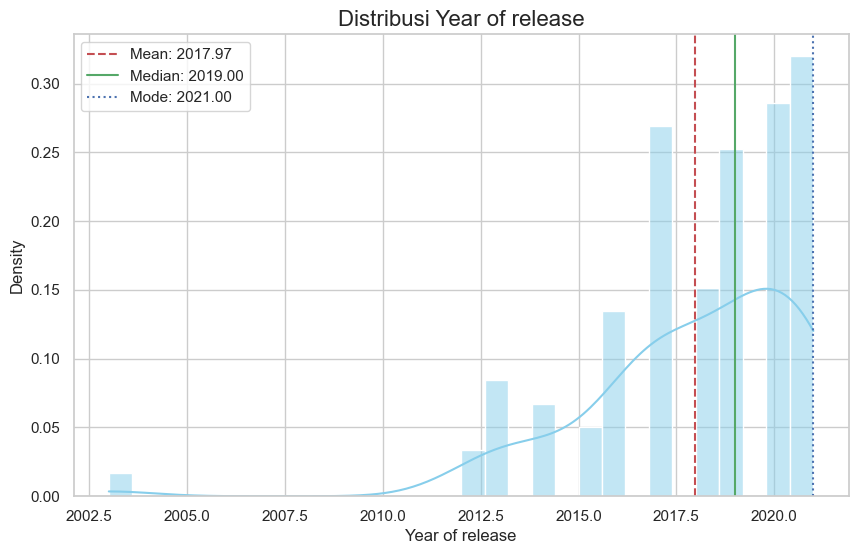

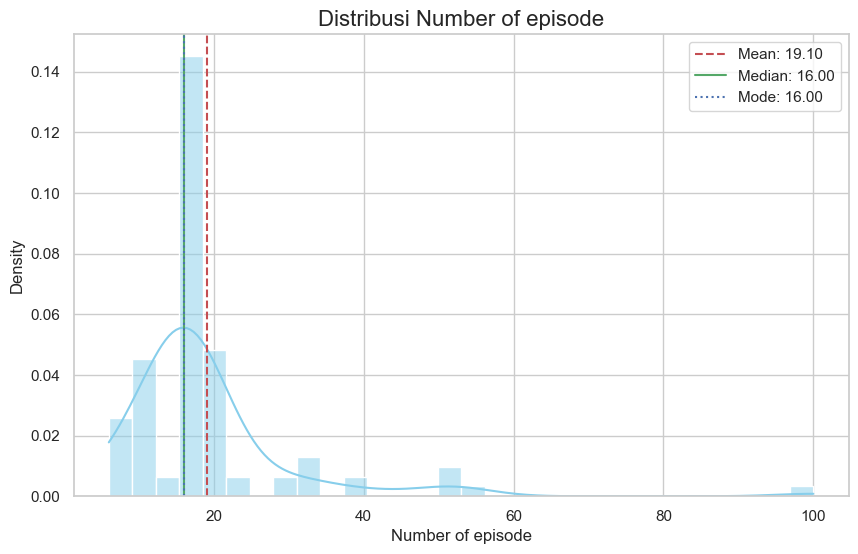

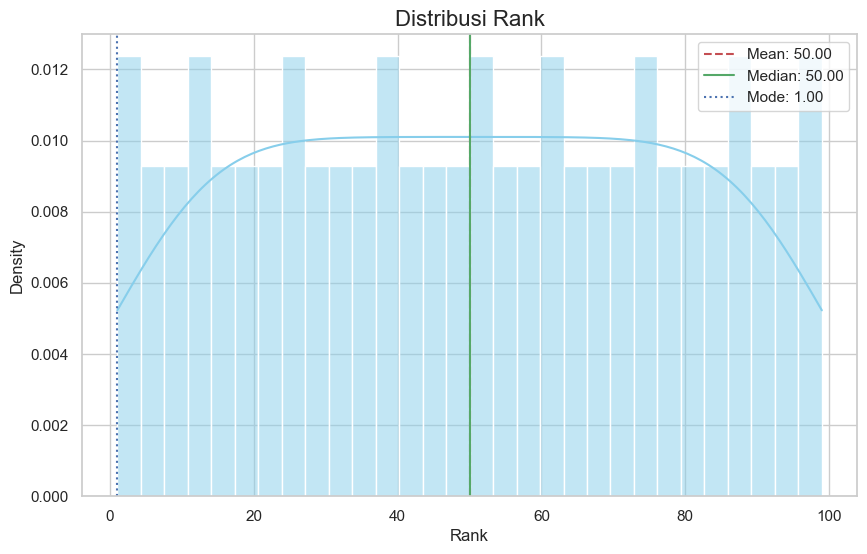

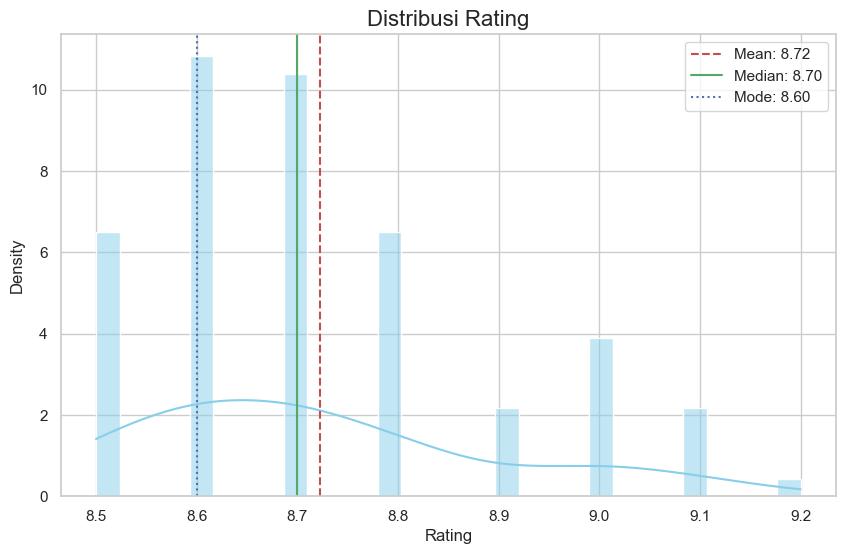

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Memuat dataset
data_path = 'C:/Users/DELL/OneDrive/Analisis Data Ekploratif/Rekomendasi Drama Korea-Data Tugas EDA.csv'
df = pd.read_csv(data_path, delimiter=';')

# Mengonversi 'Rating' menjadi float jika ada koma
df['Rating'] = df['Rating'].str.replace(',', '.').astype(float)

# Memilih kolom numerik
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
sns.set(style="whitegrid")

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    
    sns.histplot(df[column].dropna(), kde=True, bins=30, color='skyblue', stat="density")

    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  

    plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
    plt.axvline(mode, color='b', linestyle=':', label=f'Mode: {mode:.2f}')

    plt.title(f'Distribusi {column.capitalize()}', fontsize=16)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Density', fontsize=12)

    plt.legend()
    plt.grid(True)
    plt.show()
